# Imports

We start with imports.

Here we are importing TensorFlow and calling it tf for ease of use.

And, Check version of TensorFlow.

In [1]:
import tensorflow as tf

print(tf.__version__)

2.5.0


# Providing the Data

The Fashion MNIST data is available directly in the tf.keras datasets API.

We load it here.

We declare an object - mnist

In [2]:
mnist = tf.keras.datasets.fashion_mnist

# Creating Training and Testing set

We create the training and testing datasets for the graphics that contain the clothing items and their labels by calling load_data on the object - mnist.

That's the training data, the training labels, the testing data, and the testing labels.

It is important to use some of our data to train the neural network and similar data that the model hasn't yet seen to test how good it is at recognizing the images.

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalizing

The values of pixels are in the number between 0 and 255.

While training a neural network, for various reasons it's easier if we treat all values as between 0 and 1.

It is called 'normalizing'.

We do it here.

Training data needed to be reshaped, because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images.

In [4]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

# Define the Neural Network

The first layer contains the number of convolutions we want to generate, the shape of the input data.

The size of the Convolution, in this case a 3x3 grid

The activation function we use is relu.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

The second layer is MaxPooling.

It is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution.

By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image.

It creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1.

It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

Then, we add another convolution.

Then, flatten the output.

The hidden layer has 128 neurons.

The last layer has 10 neurons in it because we have ten classes of clothing in the dataset.

Softmax takes a set of values, and effectively picks the biggest one. It turns [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05] into [0,0,0,0,1,0,0,0,0]

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the Neural Network

While compiling our Neural Network we have to specify two functions, a loss and an optimizer.

Computer makes a guess while trying to learn any relationship.

The LOSS function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses OPTIMIZER function to make another guess. Based on how the loss function went, it will try to minimize the loss.

Here, we are using 'sparse_categorical_crossentropy' for the loss and 'Adam' for the optimizer.

The Keras library provides a way to calculate and report on a suite of standard metrics when training deep learning models.

This is particularly useful when we want to keep track of a performance measure that better captures the skill of our model during training. Here we will keep track of accuracy.

We can do this by specifying the “metrics” argument.

Regardless of whether our problem is a binary or multi-class classification problem, we can specify the ‘accuracy‘ metric to report on accuracy.

Here we are using the built-in accuracy metric for multi-class classification problem.

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarizing the model

The Keras Python deep learning library provides tools to visualize and better understand our neural network models.

Keras provides a way to summarize a model.

The summary is textual and includes information about:

1.The layers and their order in the model.

2.The output shape of each layer.

3.The number of parameters (weights) in each layer.

4.The total number of parameters (weights) in the model.

The summary can be created by calling the summary() function on the model that returns a string that in turn can be printed.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# Training the Neural Network

We train the neural network using training data in model.fit. Here it learns the relationship between the image and the labels.

It will go through the "OPTIMIZER" and "LOSS" loop for the number of epochs we specify.

In [8]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 73s 36ms/step - loss: 0.4393 - accuracy: 0.8413
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2921 - accuracy: 0.8935
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2487 - accuracy: 0.9076
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2168 - accuracy: 0.9186
Epoch 5/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1883 - accuracy: 0.9294


# Evaluate the Model

Now, we have a model which has learned the relationship between the image and the labels.

To evaluate the model we call model.evaluate, and pass in the two test sets.

In [9]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 10s 7ms/step - loss: 0.2479 - accuracy: 0.9088


# Visualizing the Convolutions and Pooling

The print (test_labels[:100]) shows us the first 100 labels in the test set.

In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


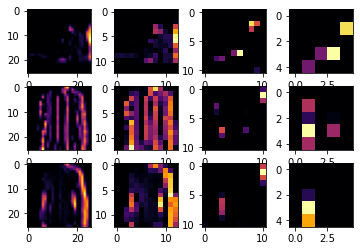

In [11]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)